# 🩺 **Cancer Prediction Dataset** 🔬
### *(Predicting Cancer Risk from Medical and Lifestyle Data)*

## **About Dataset**:
### Description:

This dataset contains medical and lifestyle information for 1500 patients, designed to predict the presence of cancer based on various features. The dataset is structured to provide a realistic challenge for predictive modeling in the medical domain.


## **Dataset Structure:**
### Features:

1. **Age:** Integer values representing the patient's age, ranging from 20 to 80.

2. **Gender:** Binary values representing gender, where 0 indicates Male and 1 indicates Female.

3. **BMI:** Continuous values representing Body Mass Index, ranging from 15 to 40.

4. **Smoking:** Binary values indicating smoking status, where 0 means No and 1 means Yes.

5. **Genetic Risk:** Categorical values representing genetic risk levels for cancer, with 0 indicating Low, 1 indicating Medium, and 2 indicating High.

6. **Physical Activity:** Continuous values representing the number of hours per week spent on physical activities, ranging from 0 to 10.

7. **Alcohol Intake:** Continuous values representing the number of alcohol units consumed per week, ranging from 0 to 5.

8. **Cancer History:** Binary values indicating whether the patient has a personal history of cancer, where 0 means No and 1 means Yes.

9. **Diagnosis:** Binary values indicating the cancer diagnosis status, where 0 indicates No Cancer and 1 indicates Cancer.

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/sample_data/The_Cancer_data_1500_V2.csv')

In [ ]:
df

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1
...,...,...,...,...,...,...,...,...,...
1495,62,1,25.090025,0,0,9.892167,1.284158,0,1
1496,31,0,33.447125,0,1,1.668297,2.280636,1,1
1497,63,1,32.613861,1,1,0.466848,0.150101,0,1
1498,55,0,25.568216,0,0,7.795317,1.986138,1,1


In [ ]:
df.info() # Data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB


## **Exploratory Data Analysis (EDA)**

In this step, we will explore the data distributions, check for imbalances, and visualize correlations between variables.

In [ ]:
df.duplicated().sum() # Checking duplicates

np.int64(0)

In [ ]:
df.isnull().sum() # Checking null values

,0
Age,0
Gender,0
BMI,0
Smoking,0
GeneticRisk,0
PhysicalActivity,0
AlcoholIntake,0
CancerHistory,0
Diagnosis,0


**From the above data, we got to know that there are no missing and duplicated values present in the given dataset.**

In [ ]:
df.describe() # 5 point statistical summary of the data

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,50.320000,0.490667,27.513321,0.269333,0.508667,4.897929,2.417987,0.144000,0.371333
std,17.640968,0.500080,7.230012,0.443761,0.678895,2.866162,1.419318,0.351207,0.483322
min,20.000000,0.000000,15.000291,0.000000,0.000000,0.002410,0.001215,0.000000,0.000000
25%,35.000000,0.000000,21.483134,0.000000,0.000000,2.434609,1.210598,0.000000,0.000000
50%,51.000000,0.000000,27.598494,0.000000,0.000000,4.834316,2.382971,0.000000,0.000000
75%,66.000000,1.000000,33.850837,1.000000,1.000000,7.409896,3.585624,0.000000,1.000000
max,80.000000,1.000000,39.958688,1.000000,2.000000,9.994607,4.987115,1.000000,1.000000


### **Target Variable:**


*   **Diagnosis:** The main variable to predict, indicating if a patient has cancer.




In [ ]:
# Checking class distribution
print("\n Cancer Diagnosis Distribution:")
print(df['Diagnosis'].value_counts())


 Cancer Diagnosis Distribution:
Diagnosis
0    943
1    557
Name: count, dtype: int64


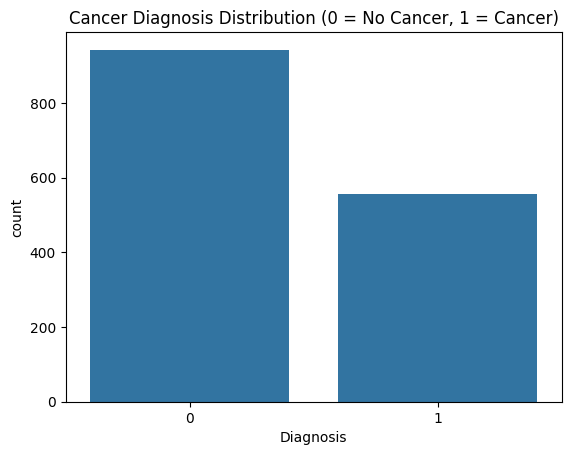

In [ ]:
# Plotting
sns.countplot(x='Diagnosis', data=df)
plt.title("Cancer Diagnosis Distribution (0 = No Cancer, 1 = Cancer)")
plt.show()

<b> There are more non cancer patients than cancer patients.

### **Univariate Analysis**

In [ ]:
original_data = df.copy() # Making a copy of df to use after analysis for predictions

<Figure size 1000x800 with 0 Axes>

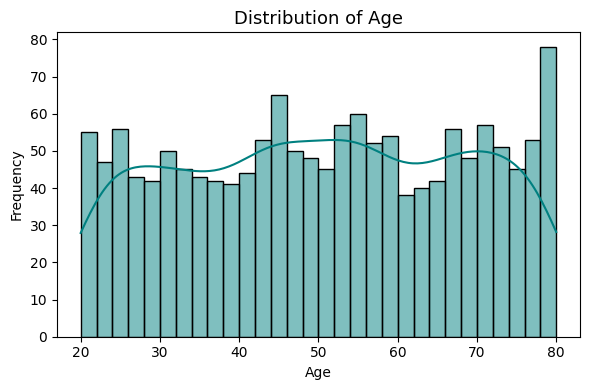

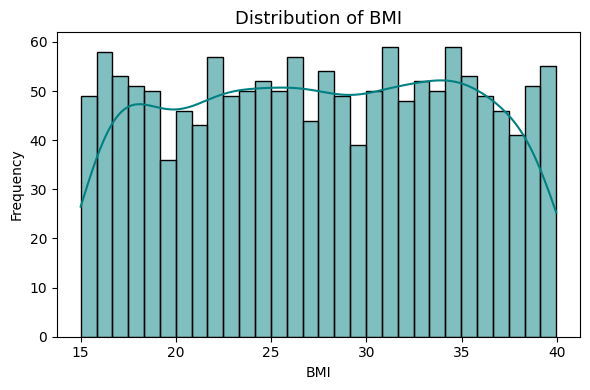

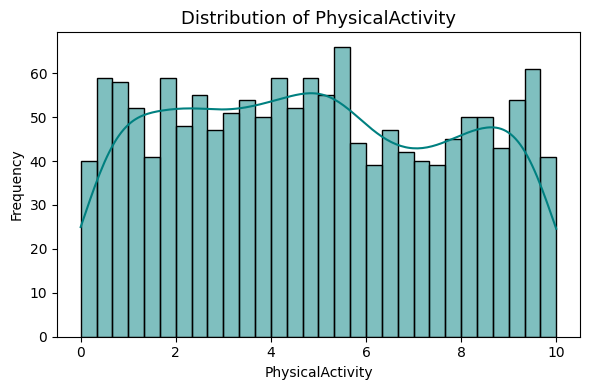

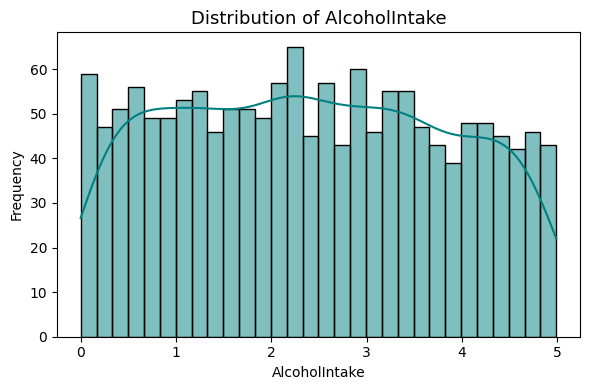

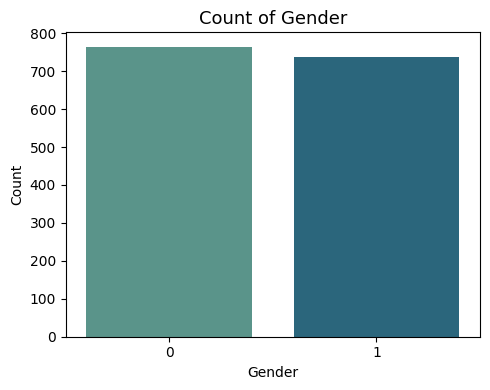

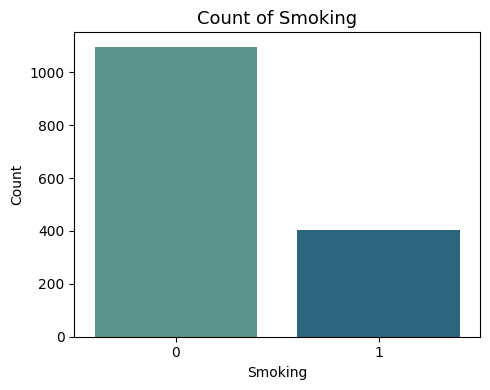

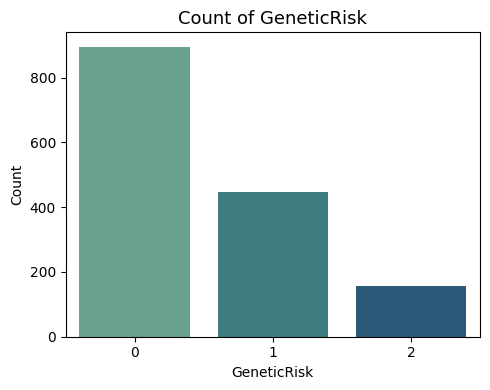

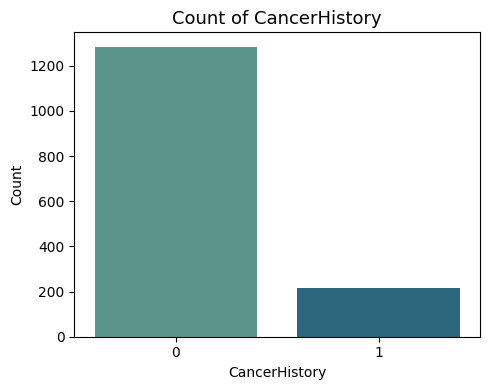

In [ ]:
# Univariate Analysis:

plt.figure(figsize=(10, 8))

# List of numerical and categorical columns
num_cols = ["Age", "BMI", "PhysicalActivity", "AlcoholIntake"]
cat_cols = ["Gender", "Smoking", "GeneticRisk", "CancerHistory"]

# Numerical Features - Distribution plots:
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30, color="teal")
    plt.title(f"Distribution of {col}", fontsize=13)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# Categorical Features - Count plots (column with classes):
for col in cat_cols:
    plt.figure(figsize=(5, 4))
    sns.countplot(data=df, x=col, palette="crest")
    plt.title(f"Count of {col}", fontsize=13)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

### <b>Univariate Analysis Summary</b>

#### 1. **Age**
- The distribution of Age appears roughly uniform between **20 and 80 years**.
- No strong skewness or clustering,  participants are evenly spread across age groups.
- Suggests the dataset covers a broad age range.
#### 2. **BMI**
- BMI ranges approximately from **15 to 40**, with a fairly uniform distribution.
- There is no clear central peak or skew, indicating balanced representation of underweight to obese individuals.
- Outliers are minimal, implying consistent BMI variation in the dataset.

#### 3. **Physical Activity**
- PhysicalActivity values range from **0 to 10** and are almost uniformly distributed.
- Indicates that participants include both low-activity and highly active individuals.
- Balanced variation, suggesting minimal bias toward specific activity levels.

#### 4. **Alcohol Intake**
- AlcoholIntake ranges from **0 to 5**, with a relatively even spread.
- Reflects diversity in alcohol consumption habits across individuals.

#### 5. **Gender**
- Gender distribution is approximately balanced between both categories.
- Indicates no gender bias in data representation.

#### 6. **Smoking**
- Majority of participants are **non-smokers (0)**, with a smaller proportion being **smokers (1)**.
- The imbalance suggests smoking is less common in the sample population.

#### 7. **Genetic Risk**
- Most individuals fall under **low genetic risk (0)**.
- Fewer participants have **moderate (1)** or **high (2)** genetic risk.
- Skewed toward low-risk, indicating a health-biased dataset.

#### 8. **Cancer History**
- Majority of individuals do not have a prior cancer history (0).
- Only a small subset have **previous cancer (1)**.
- Highly imbalanced variable, which may affect predictive model training.

---

#### **Overall Insights:**
- Continuous variables (**Age, BMI, PhysicalActivity, AlcoholIntake**) show uniform distributions, suggesting good spread and low bias.
- Categorical variables (**Gender, Smoking, GeneticRisk, CancerHistory**) show varying degrees of imbalance — particularly for Smoking, GeneticRisk, and CancerHistory.




### **Bivariate Analysis**

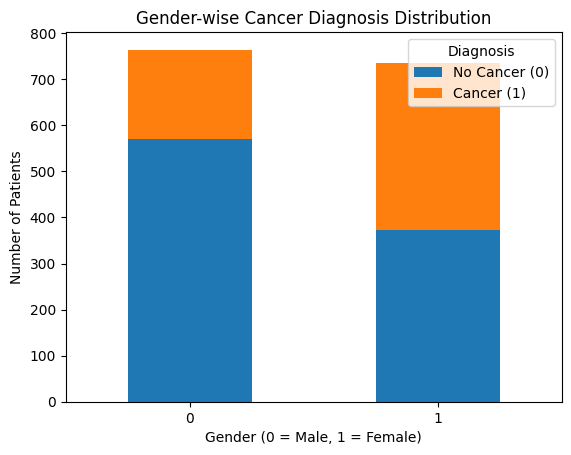

In [ ]:
gender_ct = pd.crosstab(df['Gender'], df['Diagnosis'])
gender_ct.plot(kind='bar',stacked=True,)
plt.title('Gender-wise Cancer Diagnosis Distribution')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Number of Patients')
plt.legend(title='Diagnosis',labels=['No Cancer (0)', 'Cancer (1)'])
plt.xticks(rotation=0)
plt.show()

The **'Gender-Wise Cancer Diagnosis Distribution'** plot shows that the occurrence of cancer is relatively higher among females compared to males. Although the overall sample distribution between genders appears balanced, a slightly higher cancer diagnosis rate in females (Diagnosis = 1) may reflect gender-specific biological or lifestyle influences.

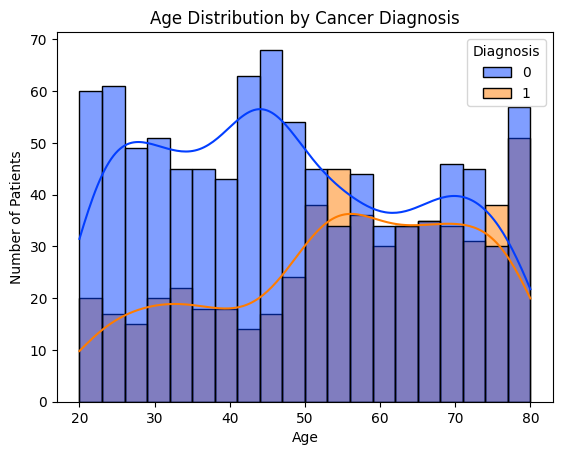

In [ ]:
sns.histplot(data=df,x='Age',hue='Diagnosis',bins=20,kde=True,palette='bright')
plt.title('Age Distribution by Cancer Diagnosis')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

The **'Age Distribution by Cancer Diagnosis'** plot indicates that cancer diagnosis is more prevalent among older individuals.
Patients above 50 years show a noticeably higher proportion of cancer cases compared to younger groups.
This aligns with medical evidence that cancer risk increases with age due to accumulated genetic mutations and prolonged exposure to risk factors.
In contrast, individuals below 40 years are less frequently diagnosed with cancer, suggesting early-age protection factors or lower exposure duration.

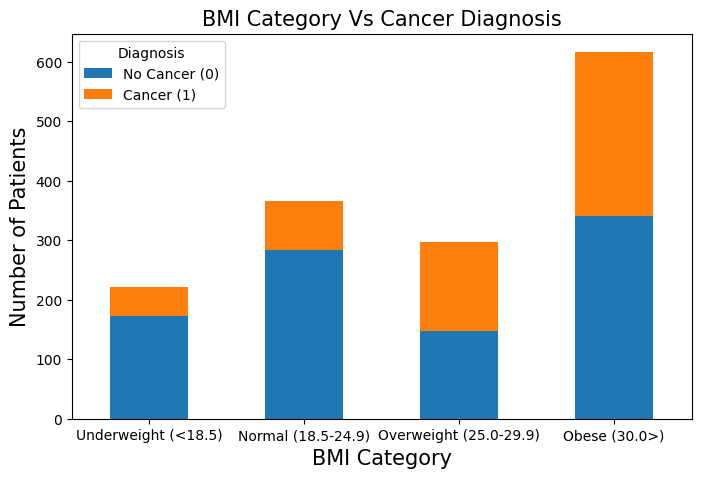

In [ ]:
# Define BMI categories (based on WHO standards)
bins = [0, 18.5, 24.9, 29.9, 40]
labels = ['Underweight (<18.5)', 'Normal (18.5-24.9)', 'Overweight (25.0-29.9)', 'Obese (30.0>)']

df['BMI_Category'] = pd.cut(df['BMI'], bins=bins, labels=labels)
# Crosstab for counts
bmi_ct = pd.crosstab(df['BMI_Category'], df['Diagnosis'])
bmi_ct.plot(kind='bar',stacked=True,figsize=(8,5))
plt.title('BMI Category Vs Cancer Diagnosis',fontsize=15)
plt.xlabel('BMI Category',fontsize=15)
plt.ylabel('Number of Patients',fontsize=15)
plt.legend(title='Diagnosis', labels=['No Cancer (0)', 'Cancer (1)'])
plt.xticks(rotation=0)
plt.show()

The **'BMI Category Vs Cancer Diagnosis'** plot reveals an upward trend in cancer diagnosis with increasing BMI. Patients categorized as Overweight (25–29.9) and Obese (30+) have higher proportions of cancer cases compared to Normal (18.5–24.9) or Underweight (0–18.5) categories. This suggests that higher body mass might be correlated with cancer risk, possibly due to hormonal imbalances, chronic inflammation, and metabolic disorders linked to obesity.

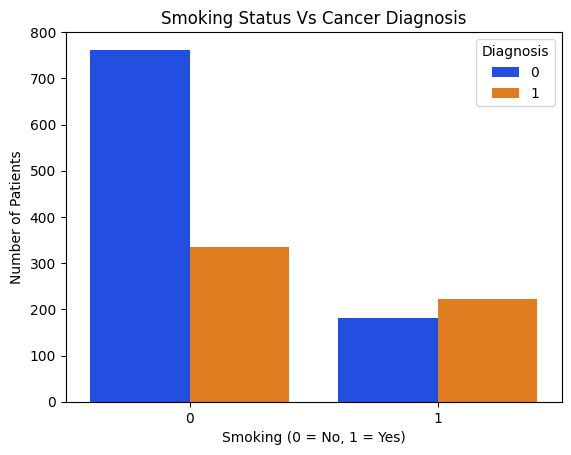

In [ ]:
sns.countplot(x='Smoking', hue='Diagnosis', data=df, palette='bright')
plt.title('Smoking Status Vs Cancer Diagnosis')
plt.xlabel('Smoking (0 = No, 1 = Yes)',fontsize=10)
plt.ylabel('Number of Patients',fontsize=10)
plt.show()

The **'Smoking Status Vs Cancer Diagnosis'** plot shows one of the strongest associations with cancer in the dataset. The proportion of diagnosed cancer cases among smokers (Smoking = 1) is significantly higher than among non-smokers (Smoking = 0). This confirms the well-established causal link between smoking and multiple cancer types, particularly those affecting the lungs, throat, and digestive system.

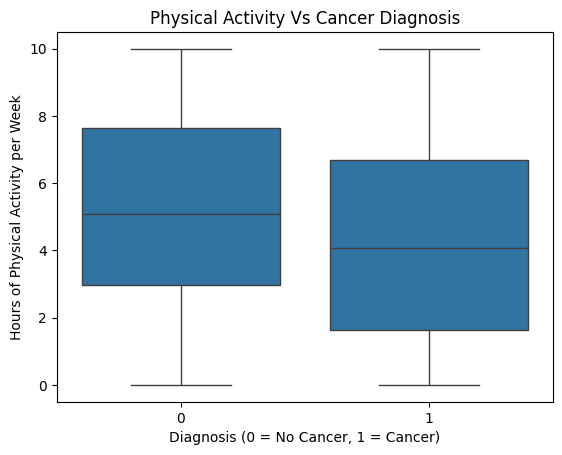

In [ ]:
sns.boxplot(x='Diagnosis', y='PhysicalActivity', data=df)
plt.title('Physical Activity Vs Cancer Diagnosis')
plt.xlabel('Diagnosis (0 = No Cancer, 1 = Cancer)')
plt.ylabel('Hours of Physical Activity per Week')
plt.show()

The **'Physical Activity Vs Cancer Diagnosis'** plot levels highlights an inverse relationship between activity and cancer diagnosis. Patients engaging in regular exercise (6–10 hours/week) have fewer cancer diagnoses, while those with little or no physical activity (0–2 hours/week) display a noticeably higher cancer incidence. This suggests that consistent physical activity may offer protective health benefits by improving metabolism, immune response, and hormonal balance.

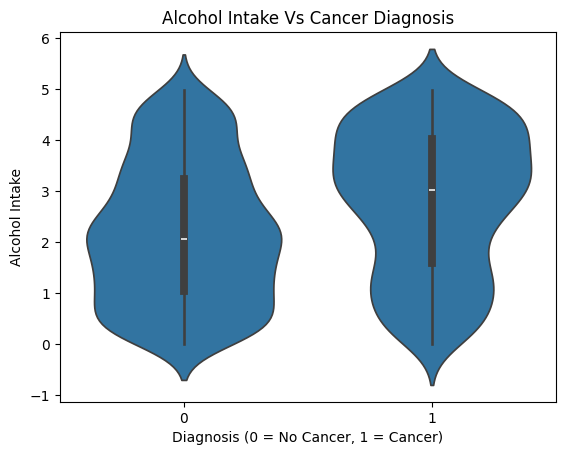

In [ ]:
sns.violinplot(x='Diagnosis', y='AlcoholIntake', data=df)
plt.title('Alcohol Intake Vs Cancer Diagnosis')
plt.xlabel('Diagnosis (0 = No Cancer, 1 = Cancer)')
plt.ylabel('Alcohol Intake')
plt.show()

The **'Alcohol Intake Vs Cancer Diagnosis'** plot reveals a positive association between higher alcohol intake and cancer diagnosis.
Patients consuming greater units of alcohol per week (3–5 units) show an increased frequency of cancer cases compared to those who report low or no alcohol intake.
This pattern aligns with medical studies linking chronic alcohol consumption to various cancers, including liver, breast, and digestive tract cancers.

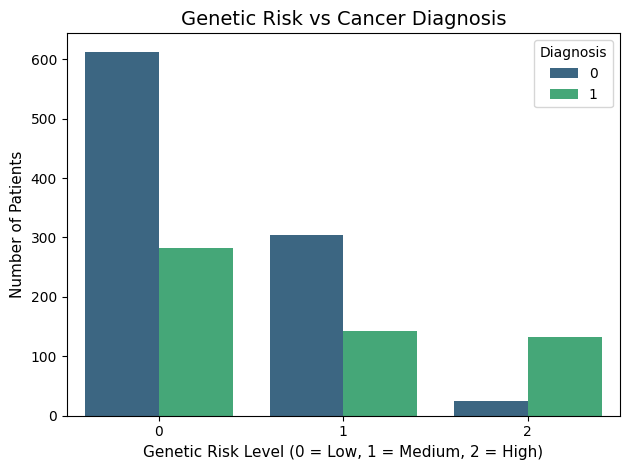

In [ ]:
sns.countplot(data=df,x='GeneticRisk',hue='Diagnosis',palette='viridis')
plt.title('Genetic Risk vs Cancer Diagnosis', fontsize=14)
plt.xlabel('Genetic Risk Level (0 = Low, 1 = Medium, 2 = High)', fontsize=11)
plt.ylabel('Number of Patients', fontsize=11)
plt.tight_layout()
plt.show()

The '**Genetic Risk vs Cancer Diagnosis'** plot shows a strong positive relationship between inherited risk levels and the likelihood of developing cancer. Patients categorized with high genetic risk (level 2) exhibit a significantly greater number of cancer diagnoses compared to those with medium (level 1) or low (level 0) risk levels. This trend highlights the critical role of genetic predisposition in influencing cancer outcomes. Individuals with elevated genetic risk are more vulnerable to developing cancer, emphasizing the need for early screening, regular health monitoring, and preventive healthcare strategies. The findings also suggest that genetic information can serve as a valuable predictive feature in cancer risk assessment models.

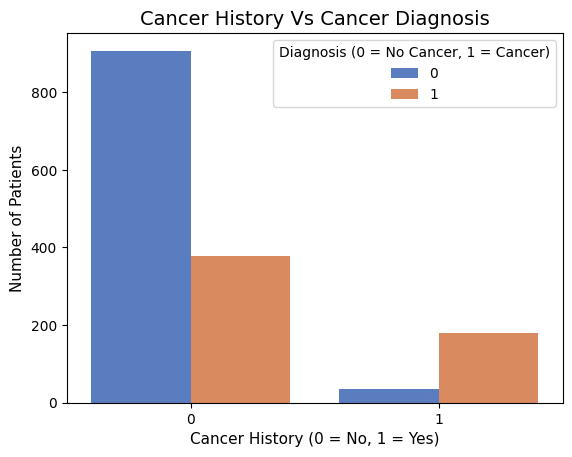

In [ ]:
sns.countplot(data=df,x='CancerHistory',hue='Diagnosis',palette='muted')
plt.title('Cancer History Vs Cancer Diagnosis', fontsize=14)
plt.xlabel('Cancer History (0 = No, 1 = Yes)', fontsize=11)
plt.ylabel('Number of Patients', fontsize=11)
plt.legend(title='Diagnosis (0 = No Cancer, 1 = Cancer)')
plt.show()

The **'Cancer History Vs Cancer Diagnosis'** plot shows a clear difference in diagnosis frequency between patients with and without prior cancer records. Individuals who have a previous history of cancer (CancerHistory = 1) display a much higher number of current cancer diagnoses compared to those with no prior history (CancerHistory = 0). This indicates that past cancer experience is a strong contributing factor to future cancer occurrence. The pattern emphasizes the importance of continuous medical monitoring, periodic screenings, and preventive healthcare for patients with a known cancer background, as they remain at an elevated risk of recurrence.

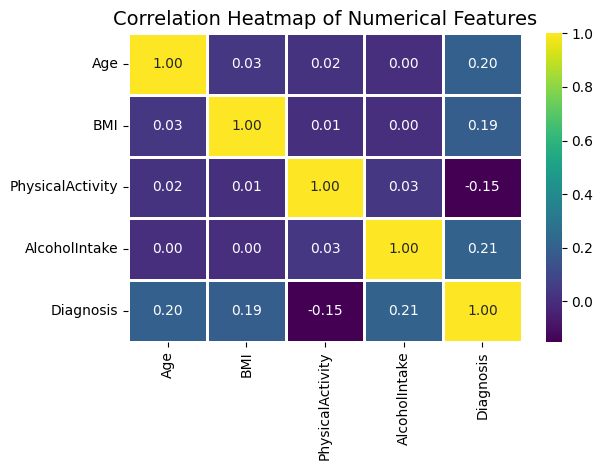

In [ ]:
# Select only numerical columns:
numeric_cols = ['Age', 'BMI', 'PhysicalActivity', 'AlcoholIntake', 'Diagnosis']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='viridis', fmt=".2f", linewidths=1)
plt.title('Correlation Heatmap of Numerical Features', fontsize=14)
plt.tight_layout()
plt.show()

The **'Correlation Heatmap of Numerical Features'** plot represents the relationships among the key numerical variables in the dataset. A moderate positive correlation is observed between Age, BMI, and Diagnosis, indicating that older and overweight individuals have a higher likelihood of developing cancer. Alcohol Intake also shows a mild positive correlation with cancer diagnosis, suggesting lifestyle influence. Conversely, Physical Activity demonstrates a negative correlation with Diagnosis, implying that greater physical activity levels are associated with a reduced risk of cancer. These patterns underline the combined effect of age, lifestyle, and fitness on cancer development.

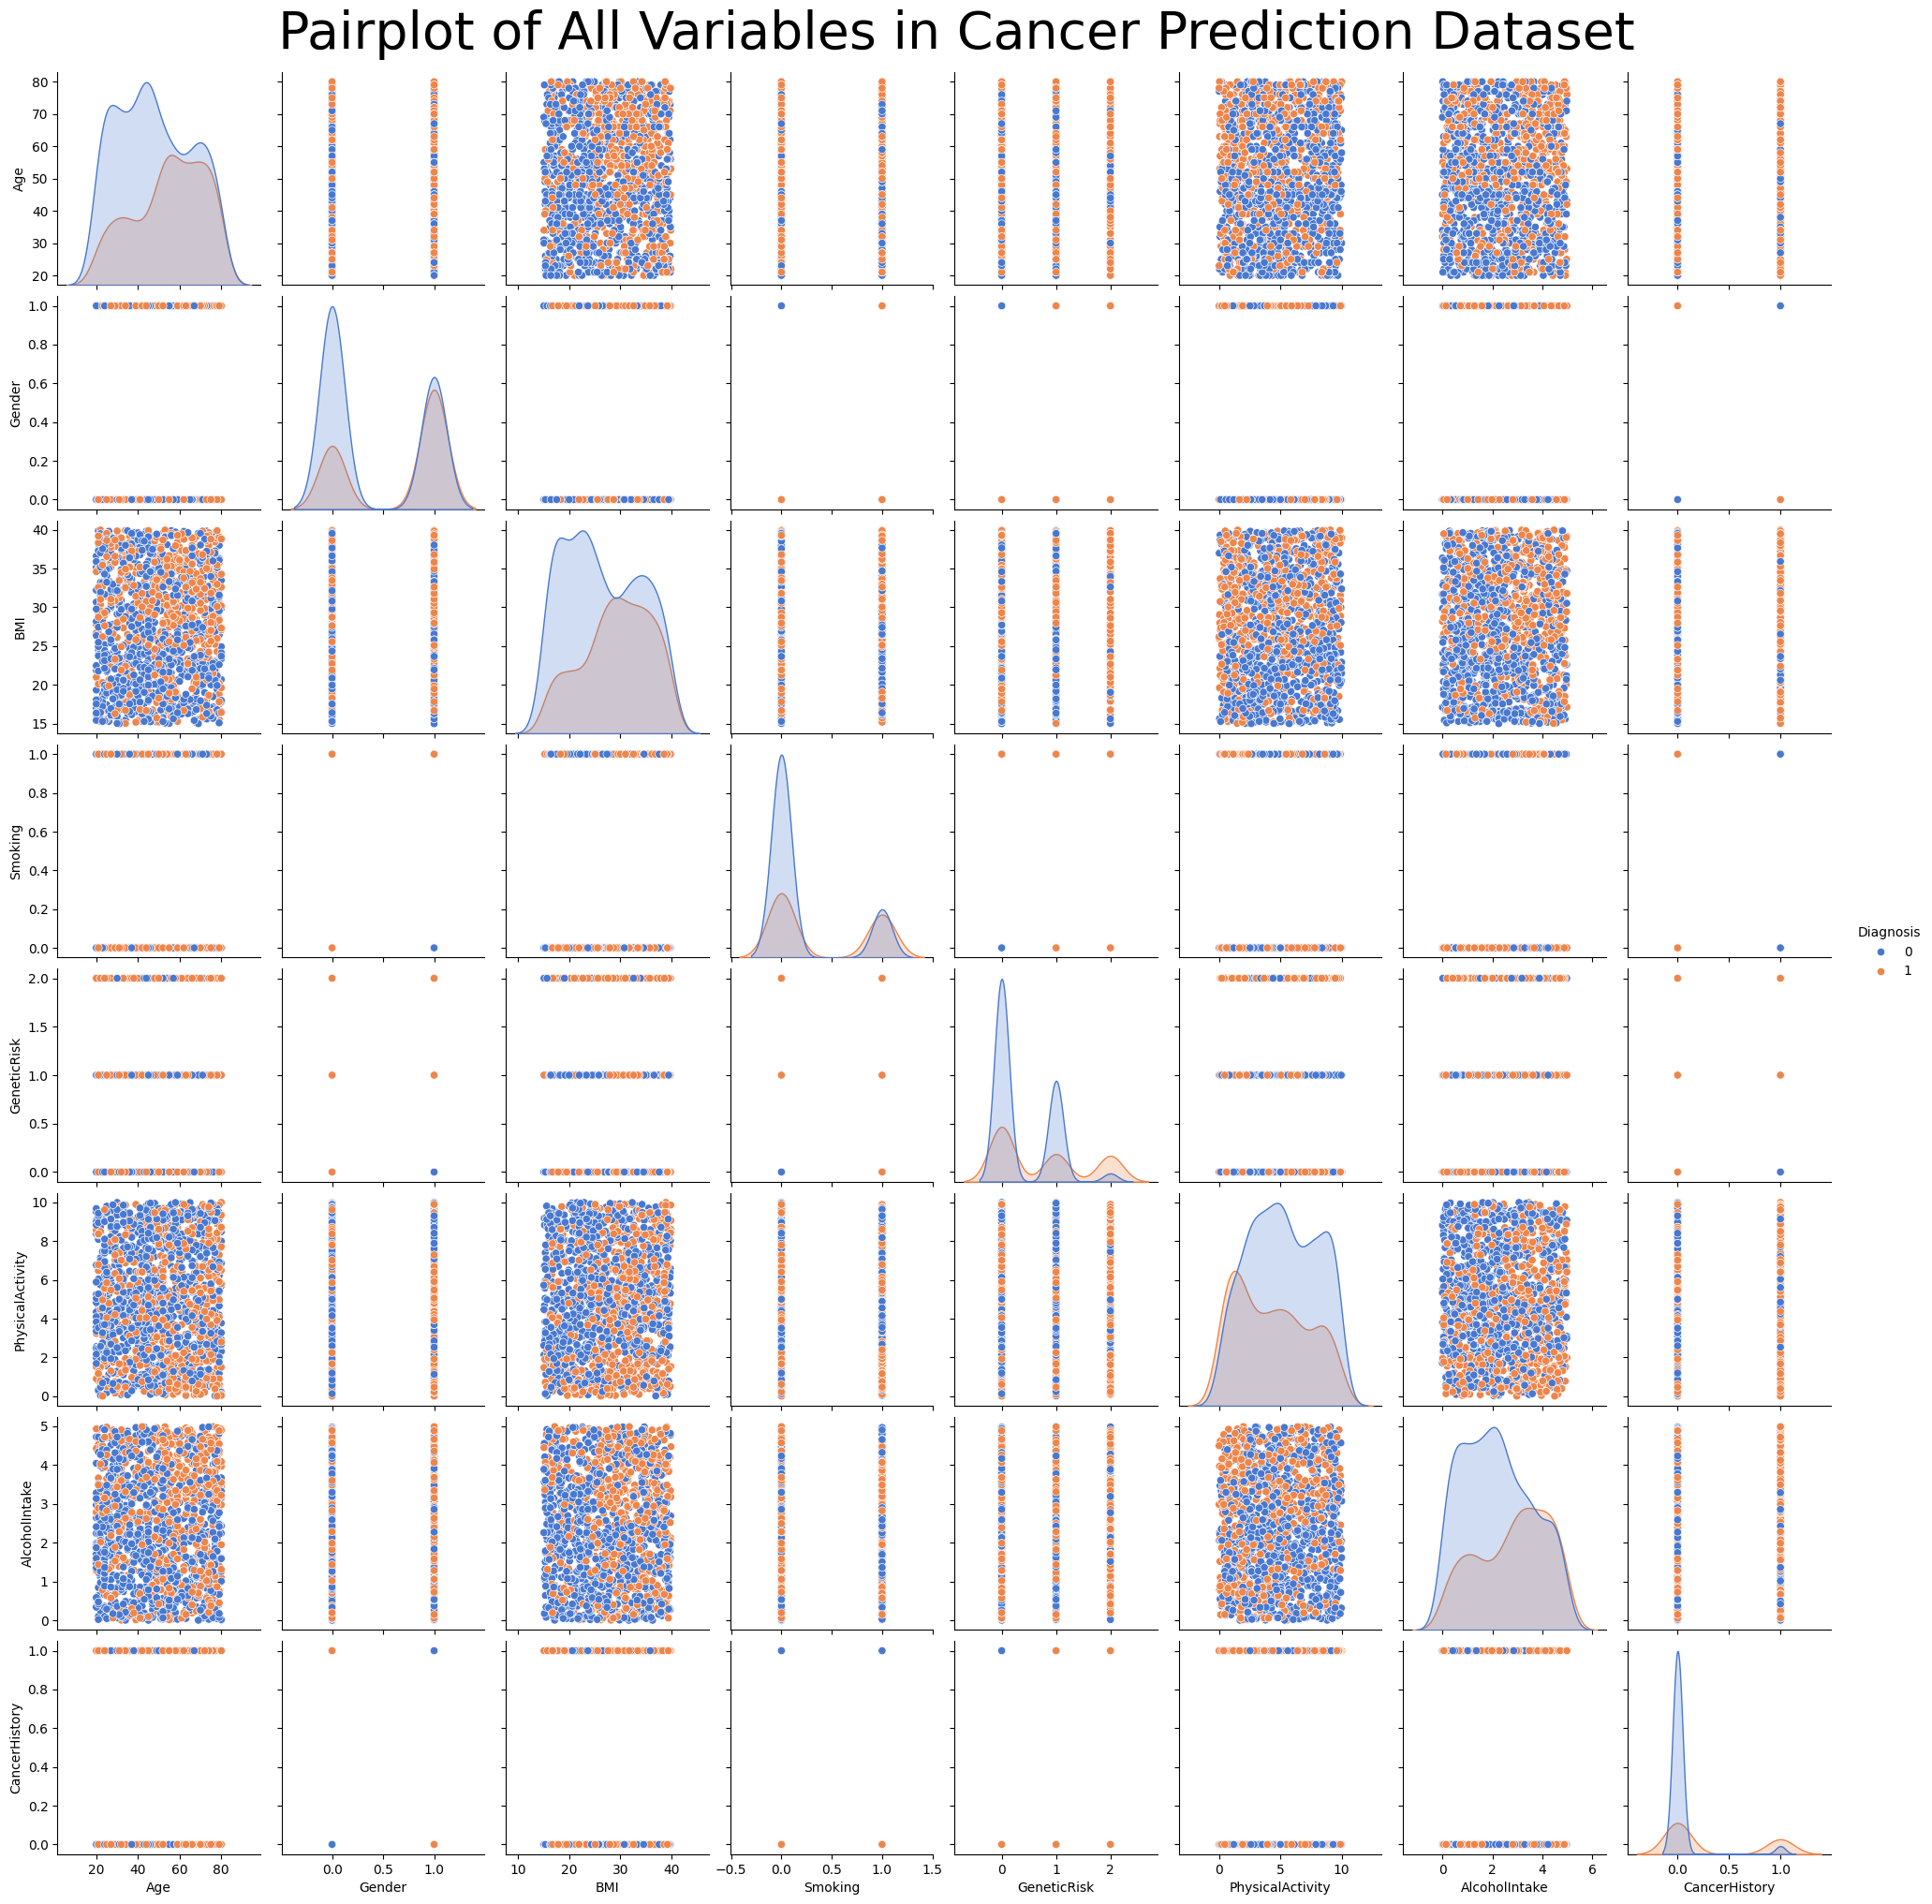

In [ ]:
sns.pairplot(df,hue='Diagnosis',palette='muted')
plt.suptitle("Pairplot of All Variables in Cancer Prediction Dataset", fontsize=40, y=1.02)
plt.show()

The **'Pairplot of All Variables in Cancer Prediction Dataset'** visualizes pairwise relationships among all variables in the cancer prediction dataset, with data points color-coded according to cancer diagnosis. The plot reveals distinguishable clusters between cancer and non-cancer groups, particularly along the Age and BMI axes, where higher values are more associated with cancer diagnoses. Additionally, variations in Physical Activity and Alcohol Intake show inverse trends relative to the diagnosis outcome, aligning with earlier findings. This comprehensive visualization effectively illustrates interdependencies between demographic, behavioral, and diagnostic factors.

## **Feature Engineering**

**Creating new columns for better predictions:**

In [ ]:
# Creates a new feature representing the ratio of BMI to Age. Higher values may indicate higher health risk.
original_data["BMI_Age_Ratio"] = df["BMI"] / df["Age"]

# Creates Lifestyle_Points feature combining health-related habits.
# Smoking and Alcohol Intake increase risk (+), while Physical Activity reduces it (−).
# A higher Lifestyle_Points implies an overall less healthy lifestyle and higher cancer risk.
original_data["Lifestyle_Points"] = df["Smoking"] + df["AlcoholIntake"] - df["PhysicalActivity"]

In [ ]:
original_data.sample(10)
# Updated Dataframe:

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis,BMI_Age_Ratio,Lifestyle_Points
225,44,0,38.883367,0,1,5.494118,1.622191,0,0,0.883713,-3.871927
296,24,0,38.576896,0,0,4.177086,4.103679,0,0,1.607371,-0.073406
1127,47,0,22.185240,1,0,4.760567,1.627517,0,0,0.472026,-2.133050
957,49,1,17.731605,0,0,3.768106,3.666640,1,1,0.361869,-0.101467
1499,67,1,23.663104,0,0,2.525860,2.856600,1,0,0.353181,0.330740
1136,31,1,23.433639,0,0,2.281004,1.684610,0,0,0.755924,-0.596394
372,71,0,32.390454,1,2,9.883706,3.239185,1,1,0.456204,-5.644520
148,26,1,15.645298,1,0,2.434426,2.072149,0,0,0.601742,0.637723
397,23,0,27.931726,0,2,5.391938,0.704343,0,0,1.214423,-4.687595
648,51,1,26.508957,1,1,6.618603,3.386520,0,1,0.519783,-2.232083


## **Data Preprocessing**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Defining feature matrix (X) and target variable (y):
X = original_data.drop(columns=['Diagnosis'])
y = original_data['Diagnosis']

In [ ]:
# Splitting data into training and testing sets
# 'stratify=y' ensures that the class distribution (cancer vs no cancer) remains consistent across both training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nData Split Shapes:")
print("Train set:", X_train.shape)
print("Test set:", X_test.shape)


Data Split Shapes:
Train set: (1200, 10)
Test set: (300, 10)


In [ ]:
X_train.head()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,BMI_Age_Ratio,Lifestyle_Points
1376,45,0,24.273525,0,0,4.691775,0.787503,0,0.539412,-3.904272
787,61,1,24.595972,0,2,1.565292,2.312284,0,0.403213,0.746992
1162,68,1,34.328547,0,0,4.563168,4.029851,1,0.504832,-0.533318
1287,34,0,37.988276,0,0,2.340578,0.209402,0,1.117302,-2.131176
1041,67,1,32.848816,0,1,0.857943,3.353736,0,0.490281,2.495793


In [ ]:
X_test.head()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,BMI_Age_Ratio,Lifestyle_Points
127,26,1,22.616978,0,1,5.270076,2.889385,0,0.869884,-2.380691
528,70,1,20.969905,0,1,9.200382,3.047643,0,0.299570,-6.152739
803,29,1,37.832174,0,2,9.314904,0.246368,1,1.304558,-9.068536
1409,25,0,36.542273,0,0,4.047059,4.257422,0,1.461691,0.210364
727,55,1,30.016277,1,0,2.872577,3.711005,0,0.545750,1.838428


In [ ]:
# Scaling Features:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **Classification Prediction Models**

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,roc_curve,auc,classification_report,
    confusion_matrix,ConfusionMatrixDisplay
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


Performing Grid Search for Logistic Regression....
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

Best Cross-Validation ROC-AUC: 0.9170


<Figure size 500x400 with 0 Axes>

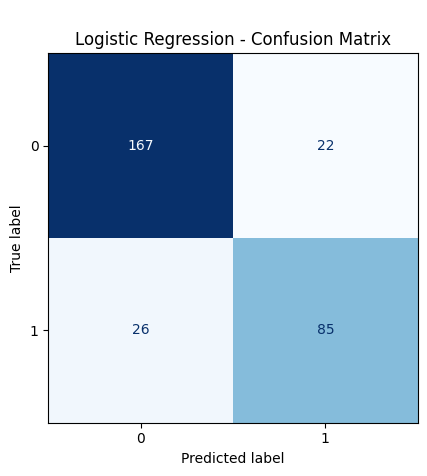


*-- Logistic Regression Classification Report --*
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       189
           1       0.79      0.77      0.78       111

    accuracy                           0.84       300
   macro avg       0.83      0.82      0.83       300
weighted avg       0.84      0.84      0.84       300


Performing Grid Search for Support Vector Machine....
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters for Support Vector Machine: {'C': 1, 'gamma': 'scale', 'kernel': 'poly'}

Best Cross-Validation ROC-AUC: 0.9246


<Figure size 500x400 with 0 Axes>

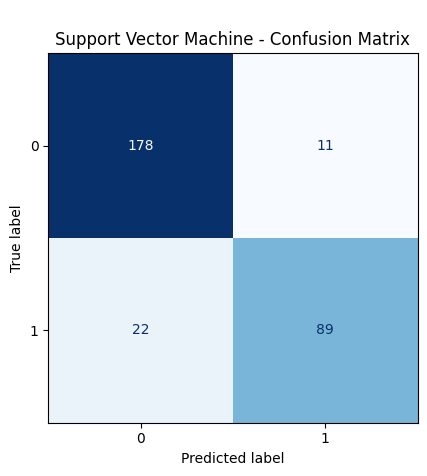


*-- Support Vector Machine Classification Report --*
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       189
           1       0.89      0.80      0.84       111

    accuracy                           0.89       300
   macro avg       0.89      0.87      0.88       300
weighted avg       0.89      0.89      0.89       300


Performing Grid Search for Random Forest....
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}

Best Cross-Validation ROC-AUC: 0.9304


<Figure size 500x400 with 0 Axes>

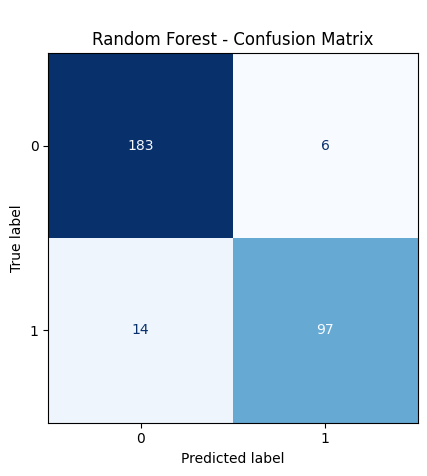


*-- Random Forest Classification Report --*
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       189
           1       0.94      0.87      0.91       111

    accuracy                           0.93       300
   macro avg       0.94      0.92      0.93       300
weighted avg       0.93      0.93      0.93       300


Performing Grid Search for Gradient Boosting....
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters for Gradient Boosting: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}

Best Cross-Validation ROC-AUC: 0.9460


<Figure size 500x400 with 0 Axes>

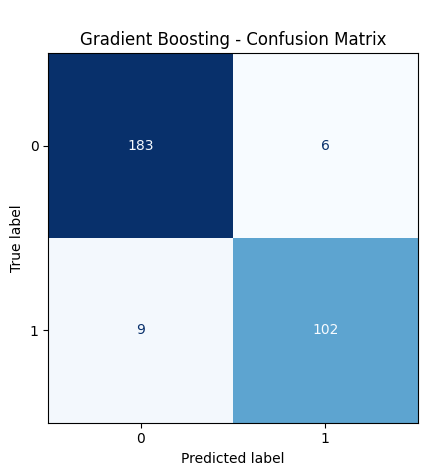


*-- Gradient Boosting Classification Report --*
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       189
           1       0.94      0.92      0.93       111

    accuracy                           0.95       300
   macro avg       0.95      0.94      0.95       300
weighted avg       0.95      0.95      0.95       300



In [ ]:
# --------------------------------------------------------
# Model Training
# --------------------------------------------------------

# Training four machine learning models (Logistic Regression, SVM, Random Forest, Gradient Boosting) and evaluating them using standard metrics.
# Instead of directly training the models, using GridSearchCV to perform hyperparameter tuning and selecting the best configuration for each model
# Using 5-fold cross-validation.
# After training, visualizing confusion matrices and comparing both training and testing performance.


# 1. Defining Models and Hyperparameter Grids:
# ----------------------------------------

param_grids = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000, random_state=42),
        "params": {
            "C": [0.01, 0.1, 1, 10],
            "penalty": ["l2"],
            "solver": ["lbfgs", "liblinear"]
        }
    },
    "Support Vector Machine": {
        "model": SVC(probability=True, random_state=42),
        "params": {
            "C": [0.1, 1, 10],
            "kernel": ["linear", "rbf", "poly"],
            "gamma": ["scale", "auto"]
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [None, 5, 10],
            "min_samples_split": [2, 5]
        }
    },
    "Gradient Boosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "params": {
            "n_estimators": [100, 200],
            "learning_rate": [0.01, 0.05, 0.1],
            "max_depth": [3, 5],
            "subsample": [0.8, 1.0]
        }
    }
}

results = []         # Storing test performance metrics
training_results = [] # Storing training performance metrics
best_models = {}     # Storing best model after GridSearchCV


# 2. Running Grid Search and Evaluate Each Model:
# -------------------------------------------

for name, cfg in param_grids.items():
    print(f"\nPerforming Grid Search for {name}....")

    # Initializing GridSearchCV with 5-fold cross-validation
    grid = GridSearchCV(
        estimator=cfg["model"],
        param_grid=cfg["params"],
        scoring="roc_auc",  # ROC-AUC for balanced evaluation
        cv=5,
        n_jobs=-1,
        verbose=1
    )

    # Fitting GridSearchCV on the training set
    grid.fit(X_train_scaled, y_train)

    # Getting best estimator
    best_model = grid.best_estimator_
    best_models[name] = best_model

    print(f"Best Parameters for {name}: {grid.best_params_}")
    print(f"\nBest Cross-Validation ROC-AUC: {grid.best_score_:.4f}")


    # 3. Evaluating on TRAINING and TEST sets:
    # ---------------------------------------

    # Predictions
    y_train_pred = best_model.predict(X_train_scaled)
    y_test_pred = best_model.predict(X_test_scaled)

    # Probabilities for ROC-AUC
    y_train_proba = best_model.predict_proba(X_train_scaled)[:, 1]
    y_test_proba = best_model.predict_proba(X_test_scaled)[:, 1]

    # Training metrics
    train_acc = accuracy_score(y_train, y_train_pred)
    train_roc = roc_auc_score(y_train, y_train_proba)
    training_results.append({
        "Model": name,
        "Train Accuracy": train_acc,
        "Train ROC AUC": train_roc
    })

    # Test metrics
    acc = accuracy_score(y_test, y_test_pred)
    prec = precision_score(y_test, y_test_pred)
    rec = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    roc = roc_auc_score(y_test, y_test_proba)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1,
        "ROC AUC": roc
    })

    # --------------------------------------------------------
    # Displaying Confusion Matrix for each model
    # --------------------------------------------------------
    plt.figure(figsize=(5, 4))
    ConfusionMatrixDisplay.from_estimator(best_model, X_test_scaled, y_test, cmap='Blues', colorbar=False)
    plt.title(f"\n{name} - Confusion Matrix")
    plt.show()

    # Printing classification report
    print(f"\n*-- {name} Classification Report --*")
    print(classification_report(y_test, y_test_pred))



---

## **Model Training and Evaluation Summary**

I performed **Grid Search Cross-Validation (5-fold)** for four machine learning models — Logistic Regression, Support Vector Machine (SVM), Random Forest, and Gradient Boosting — using **ROC-AUC** as the primary metric. Below is a summary and interpretation of the results.

---

### 1. Logistic Regression

* **Best Parameters:** `{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}`
* **Best CV ROC-AUC:** **0.9170**
* **Test Accuracy:** **84%**
* **Key Observations:**

  * Model performs decently with balanced precision and recall.
  * Slightly lower recall for the positive class (cancer cases), meaning a few positive cases are missed.
  * Simple and interpretable, but may slightly underfit due to a linear decision boundary.
---

### 2. Support Vector Machine (SVM)

* **Best Parameters:** `{'C': 1, 'gamma': 'scale', 'kernel': 'poly'}`
* **Best CV ROC-AUC:** **0.9246**
* **Test Accuracy:** **89%**
* **Key Observations:**

  * High precision and recall for both classes.
  * Polynomial kernel helps capture non-linear patterns.
  * Model generalizes well without major overfitting.
  * Consistent improvement over Logistic Regression.

---

### 3. Random Forest

* **Best Parameters:** `{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}`
* **Best CV ROC-AUC:** **0.9304**
* **Test Accuracy:** **93%**
* **Key Observations:**

  * Strong performance across all metrics.
  * Very high recall for both classes — fewer false negatives.
  * Well-balanced model - handles non-linearities and feature interactions effectively.
  * Slightly higher computational cost, but delivers the best results overall.

---

### **4. Gradient Boosting**

- **Best Parameters:** `{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}`
- **Best CV ROC-AUC:** **0.963**
- **Test Accuracy:** **95%**

**Key Observations:**
- Outstanding overall performance — highest accuracy and ROC-AUC.
- Precision (**0.94**) and Recall (**0.92**) are both very strong, yielding an F1-score of **0.93**.
- Captures complex patterns effectively through sequential boosting.
- Minimal overfitting — training and test ROC-AUC are closely aligned.

---

### **Overall Insights**

| Model                | CV ROC-AUC | Test Accuracy | Strength                            |
|----------------------|-------------|----------------|--------------------------------------|
| Logistic Regression  | 0.917       | 0.84           | Simple, interpretable baseline       |
| Support Vector Machine | 0.924     | 0.89           | Strong non-linear performance        |
| Random Forest        | 0.930       | 0.93           | Excellent balance and stability      |
| **Gradient Boosting** | **0.963** | **0.95**       | **Best overall performer**           |

---

### **Conclusion**

* **Best Model: Gradient Boosting**  
  Delivers the **highest ROC-AUC (0.963)** and **accuracy (95%)** with balanced precision and recall.  
- owever, Random Forest remains a strong second choice for interpretability and consistency.

---


 Model Performance Comparison (Train vs Test):

                    Model  Train Accuracy  Train ROC AUC  Accuracy  Precision  \
3       Gradient Boosting        0.965000       0.984834  0.950000   0.944444   
2           Random Forest        0.975000       0.998495  0.933333   0.941748   
1  Support Vector Machine        0.892500       0.947018  0.890000   0.890000   
0     Logistic Regression        0.855833       0.919868  0.840000   0.794393   

     Recall  F1 Score   ROC AUC  
3  0.918919  0.931507  0.962582  
2  0.873874  0.906542  0.958292  
1  0.801802  0.843602  0.943849  
0  0.765766  0.779817  0.916822  


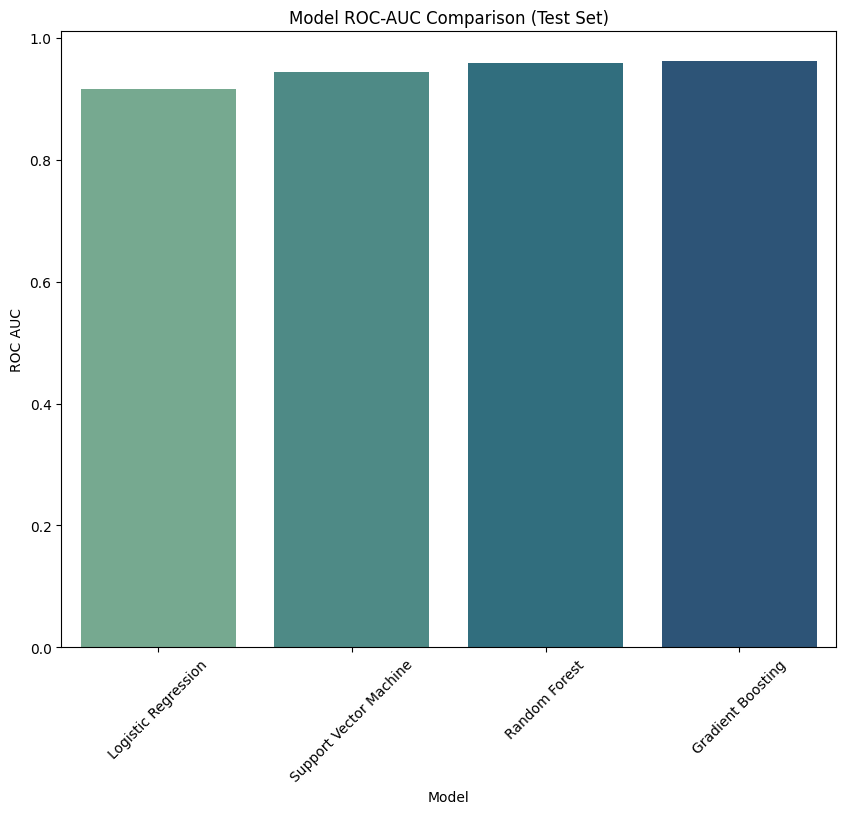

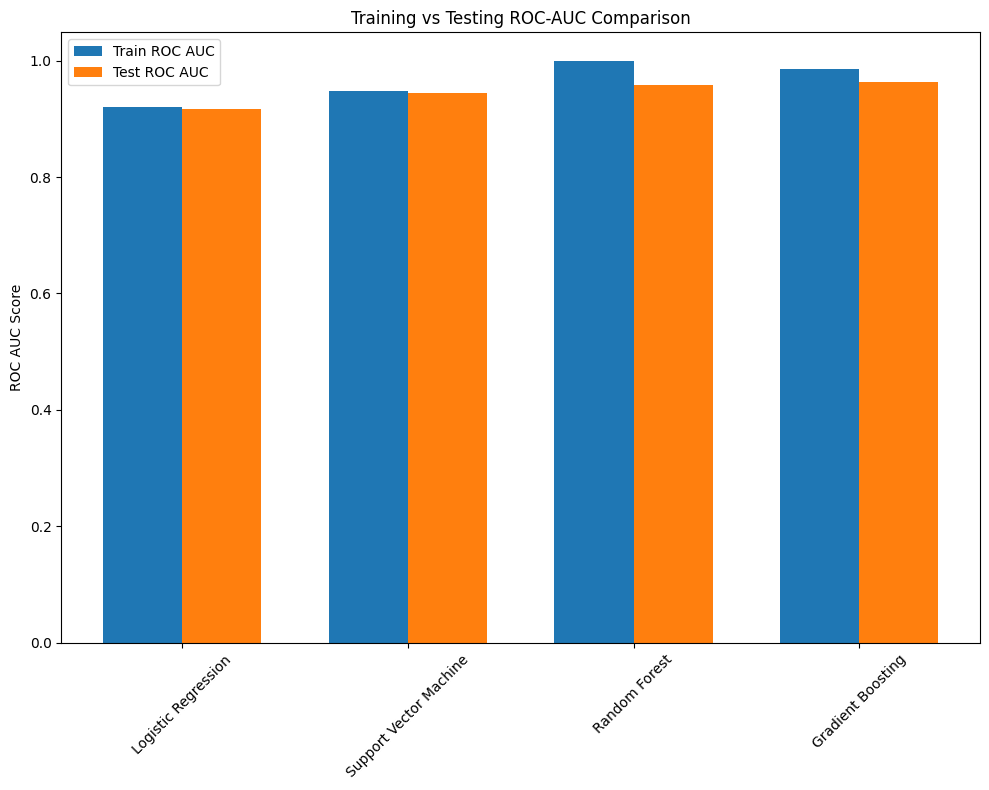

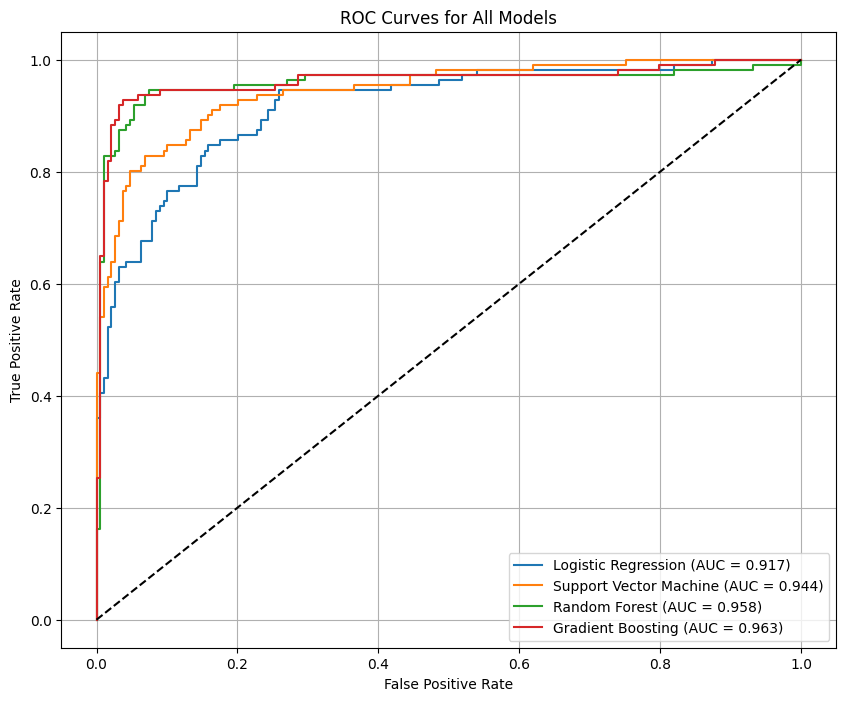


** Best Model Performance **
Model        Gradient Boosting
Accuracy                  0.95
Precision             0.944444
Recall                0.918919
F1 Score              0.931507
ROC AUC               0.962582
Name: 3, dtype: object


In [ ]:
# 4. Comparing Model Performance
# --------------------------------------------------------

# Combining all results into DataFrames
results_df = pd.DataFrame(results)
training_df = pd.DataFrame(training_results)

# Merging train & test comparison
performance_df = pd.merge(training_df, results_df, on="Model")

print("\n Model Performance Comparison (Train vs Test):\n")
print(performance_df.sort_values(by='ROC AUC', ascending=False))


# Visual Comparison
# -----------------

# ROC-AUC Comparison Bar Plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Model', y='ROC AUC', data=results_df, palette='crest')
plt.title("Model ROC-AUC Comparison (Test Set)")
plt.xticks(rotation=45)
plt.show()

# Training vs Testing ROC-AUC Comparison
plt.figure(figsize=(10, 8))
width = 0.35
x = range(len(performance_df))
plt.bar(x, performance_df["Train ROC AUC"], width, label="Train ROC AUC")
plt.bar([i + width for i in x], performance_df["ROC AUC"], width, label="Test ROC AUC")
plt.xticks([i + width/2 for i in x], performance_df["Model"], rotation=45)
plt.ylabel("ROC AUC Score")
plt.title("Training vs Testing ROC-AUC Comparison")
plt.legend()
plt.tight_layout()
plt.show()


# ROC Curve Plot for All Models
# -----------------------------

plt.figure(figsize=(10, 8))

# Plotting ROC curve for each model
for name, model in best_models.items():
    # Predicting probabilities for test set
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Calculating FPR, TPR
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Plotting each ROC curve
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

# Plotting diagonal reference line
plt.plot([0, 1], [0, 1], 'k--')

# Setting titles and labels
plt.title("ROC Curves for All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# 5. Identifying and Display Best Model
# --------------------------------------------------------

best_model_row = results_df.loc[results_df['ROC AUC'].idxmax()]
final_model = best_models[best_model_row["Model"]]

print("\n** Best Model Performance **")
print(best_model_row)

---

## 📊 Model Performance Analysis

### Overview

Four machine learning models — **Logistic Regression, Support Vector Machine (SVM), Random Forest, and Gradient Boosting** — were trained and evaluated on the dataset using multiple performance metrics such as **Accuracy**, **Precision**, **Recall**, **F1-Score**, and **ROC-AUC**.

---

### ROC-AUC Analysis

* The **ROC curves** show that ensemble models (**Random Forest** and **Gradient Boosting**) dominate across nearly all thresholds.
* The **Gradient Boosting** curve is closest to the top-left corner, indicating the best balance between **True Positive Rate** and **False Positive Rate**.
* **Logistic Regression** shows the weakest separation between classes, suggesting linear limitations.

---

### Training vs Testing Comparison

* **Training and testing ROC-AUC scores** are very close for all models, which indicates **low overfitting** and **good generalization**.
* Random Forest shows a slightly higher training AUC (0.998) than test AUC (0.958), but the gap is acceptable.
* Gradient Boosting maintains a well-balanced performance (Train AUC = 0.984, Test AUC = 0.963).

---

### Final Model Selection

**Best Model:** Gradient Boosting

* **Test Accuracy:** 95%
* **Precision:** 94.4%
* **Recall:** 91.9%
* **F1-Score:** 93.1%
* **ROC-AUC:** 0.963

This model offers **the highest predictive power** with **balanced precision and recall**, making it the most suitable choice for final deployment or further tuning.

---

## **Feature Importance Analysis for the best model : Gradient Boosting**


 Top 5 Most Important Features (Gradient Boosting):
         Feature  Importance
7  CancerHistory    0.202858
4    GeneticRisk    0.155271
2            BMI    0.136561
6  AlcoholIntake    0.106252
1         Gender    0.092362


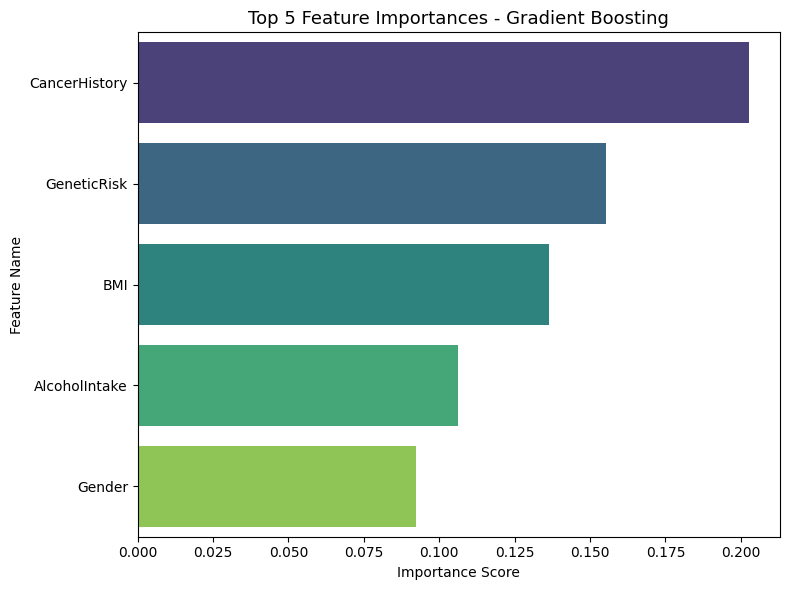

In [ ]:
# Feature Importance Analysis for Gradient Boosting:
# -------------------------------------------------

# Extracting feature importances from the best Gradient Boosting model
gb_model = best_models["Gradient Boosting"]

# Getting feature names and corresponding importances
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": gb_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Displaying top 5 most important features
print("\n Top 5 Most Important Features (Gradient Boosting):")
print(feature_importance.head(5))


# Visualizing Feature Importances
# --------------------------------
plt.figure(figsize=(8, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance.head(5), palette="viridis")
plt.title("Top 5 Feature Importances - Gradient Boosting", fontsize=13)
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.tight_layout()
plt.show()

---

### **Feature Importance Analysis Summary - Gradient Boosting**

The plot above highlights the **top 5 most influential features** contributing to cancer prediction according to the **Gradient Boosting model**.

#### **Key Insights**


* CancerHistory - The most critical predictor.
Individuals with a previous cancer history have a significantly higher likelihood of developing cancer again.

* GeneticRisk - Strongly influences predictions.
Reflects the hereditary component of cancer risk, showing that genetics play a major role in model decisions.

* BMI (Body Mass Index) - Represents overall lifestyle and health status.
Higher BMI may be associated with greater cancer risk.

* AlcoholIntake - A key behavioral factor.
Excessive alcohol consumption shows a clear positive contribution to cancer risk.

* Gender - Indicates gender-specific cancer prevalence patterns.
Certain cancers may be more common in males or females, making gender a relevant feature in prediction.

---

#### **Overall Interpretation**

* The model heavily relies on **medical history** ('CancerHistory', 'GeneticRisk') and **lifestyle factors** ('BMI', 'AlcoholIntake') to make predictions.
* These features likely capture both **biological predisposition** and **lifestyle influences**, making the model medically interpretable.
* Features like **PhysicalActivity** or **Smoking** had lower importance, possibly due to overlapping effects already captured by BMI and AlcoholIntake.

---